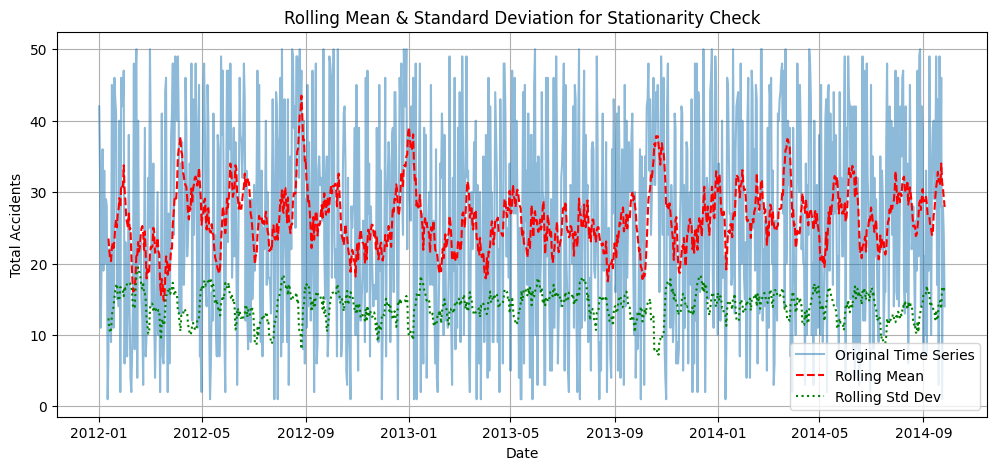

{'ADF Statistic': np.float64(-30.53908238930165),
 'p-value': 0.0,
 'Critical Values': {'1%': np.float64(-3.4369127451400474),
  '5%': np.float64(-2.864437475834273),
  '10%': np.float64(-2.568312754566378)},
 'Stationary': True}

In [7]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Load the time series data
accident_df = pd.read_csv("/content/accident_time_series_1000_rows.csv", parse_dates=["Date"], index_col="Date")

# Select the "Total Accidents" column for stationarity testing
time_series = accident_df["Total Accidents"]

# Compute rolling statistics
rolling_mean = time_series.rolling(window=12).mean()
rolling_std = time_series.rolling(window=12).std()

# Perform Augmented Dickey-Fuller test
adf_test = adfuller(time_series, autolag="AIC")
adf_result = {
    "ADF Statistic": adf_test[0],
    "p-value": adf_test[1],
    "Critical Values": adf_test[4],
    "Stationary": adf_test[1] < 0.05  # If p-value < 0.05, data is stationary
}

# Visualization of rolling statistics
plt.figure(figsize=(12, 5))
plt.plot(time_series, label="Original Time Series", alpha=0.5)
plt.plot(rolling_mean, label="Rolling Mean", color="red", linestyle="dashed")
plt.plot(rolling_std, label="Rolling Std Dev", color="green", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Total Accidents")
plt.title("Rolling Mean & Standard Deviation for Stationarity Check")
plt.legend()
plt.grid(True)
plt.show()

# Display ADF test results
adf_result
